# EXPLORATORY DATA ANALYSIS PROJECT FOR GLOBAL RETAIL CHAIN

### This project will be in parts, as the data has many dimensions. However, this is the first part.

In [45]:
#first we import relevant python modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math

In [3]:
#read the data

df = pd.read_csv(r"C:\Users\br1ght\Desktop\databank\Sales.csv")

In [4]:
#Preview the data

df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.shape

(113036, 18)

In [6]:
df.isna().values.any()

False

In [7]:
df.duplicated().values.any()

True

In [8]:
df.duplicated().sum()

1000

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [10]:
df = df.drop_duplicates()
df.shape

(112036, 18)

In [11]:
df.duplicated().values.any()

False

In [12]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### Now we have to make corrections to the data
### figures for profit, cost & revenue are wrong. 
### So, I'll drop those columns & recalculate.

##### NB: As an analyst, you have to check your data, and run your analysis to find inconsistencies.


In [13]:
# this code deletes the columns with wrong information

df = df.drop(['Profit', 'Cost', 'Revenue'], axis =1)

In [14]:
df.shape

(112036, 15)

In [15]:
df.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120


In [16]:
# this codes recalculates the columns, and appends it to the data

df['Total_Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Revenue'] = df['Order_Quantity'] * df['Unit_Price']
df['Profit'] = df['Revenue'] - df['Total_Cost']
df.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600


In [17]:
df.groupby(['Country'])['Profit'].sum()

Country
Australia         10847833
Canada             3780531
France             4283045
Germany            4351687
United Kingdom     4824853
United States     13820106
Name: Profit, dtype: int64

In [18]:
df.groupby(['Country'])['Revenue'].sum()

Country
Australia         25303706
Canada             7984694
France             9825708
Germany            9958420
United Kingdom    11016494
United States     30599566
Name: Revenue, dtype: int64

In [19]:
df.groupby(['Country', 'Product_Category'])['Revenue'].sum()

Country         Product_Category
Australia       Accessories          3262090
                Bikes               20131491
                Clothing             1910125
Canada          Accessories          2287966
                Bikes                4305186
                Clothing             1391542
France          Accessories          1614716
                Bikes                7369817
                Clothing              841175
Germany         Accessories          1713050
                Bikes                7532216
                Clothing              713154
United Kingdom  Accessories          1940541
                Bikes                8121615
                Clothing              954338
United States   Accessories          5788414
                Bikes               21367602
                Clothing             3443550
Name: Revenue, dtype: int64

In [20]:
df.groupby(['Country', 'Product_Category'])['Profit'].sum()

Country         Product_Category
Australia       Accessories         2042530
                Bikes               8076670
                Clothing             728633
Canada          Accessories         1429953
                Bikes               1728880
                Clothing             621698
France          Accessories         1010792
                Bikes               2961453
                Clothing             310800
Germany         Accessories         1075212
                Bikes               3034347
                Clothing             242128
United Kingdom  Accessories         1216103
                Bikes               3275578
                Clothing             333172
United States   Accessories         3616615
                Bikes               8716241
                Clothing            1487250
Name: Profit, dtype: int64

In [21]:
df.groupby(['Year'])['Revenue'].sum()

Year
2011    10051324
2012    10243236
2013    16892817
2014    15583042
2015    22318354
2016    19599815
Name: Revenue, dtype: int64

In [22]:
df.groupby(['Year'])['Profit'].sum()

Year
2011    3976543
2012    4047960
2013    7687922
2014    7361372
2015    9870012
2016    8964246
Name: Profit, dtype: int64

In [23]:
df.groupby(['Age_Group', 'Product_Category'])['Revenue'].sum()

Age_Group             Product_Category
Adults (35-64)        Accessories          8592030
                      Bikes               33636771
                      Clothing             4858039
Seniors (64+)         Accessories           134801
                      Bikes                 149794
                      Clothing               54061
Young Adults (25-34)  Accessories          5519201
                      Bikes               25548665
                      Clothing             3036586
Youth (<25)           Accessories          2360745
                      Bikes                9492697
                      Clothing             1305198
Name: Revenue, dtype: int64

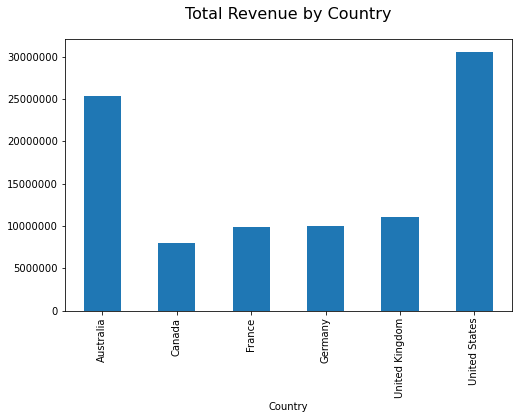

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
rev_by_country = df.groupby(['Country'])['Revenue'].sum()
rev_by_country.plot.bar()
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Total Revenue by Country',fontdict={'fontsize': 16}, y = 1.05)
plt.show()

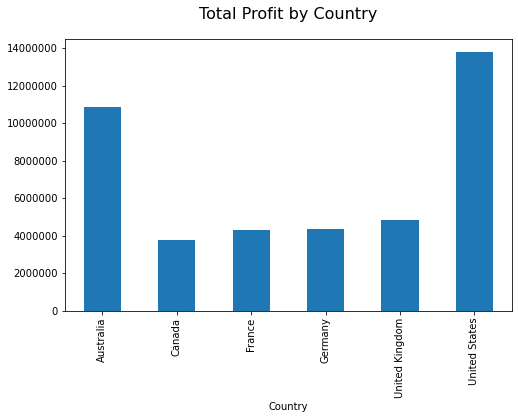

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
rev_by_country = df.groupby(['Country'])['Profit'].sum()
rev_by_country.plot.bar()
plt.ticklabel_format(style='plain', axis = 'y')
plt.title('Total Profit by Country',fontdict={'fontsize': 16}, y=1.05)
plt.show()

In [26]:
df.groupby(['Country', 'Year'])['Revenue'].sum()

Country         Year
Australia       2011    3007607
                2012    3029652
                2013    4871070
                2014    3324021
                2015    6797731
                2016    4273625
Canada          2011     795154
                2012     835858
                2013    1454692
                2014    1478871
                2015    1745637
                2016    1674482
France          2011    1107869
                2012    1127824
                2013    1658618
                2014    1647666
                2015    2175409
                2016    2108322
Germany         2011     928464
                2012     927776
                2013    1610945
                2014    1884909
                2015    2140016
                2016    2466310
United Kingdom  2011     857803
                2012     869676
                2013    1930991
                2014    2069192
                2015    2580108
                2016    2708724
United States   201

In [27]:
df.groupby(['Country', 'Age_Group'])['Revenue'].sum()

Country         Age_Group           
Australia       Adults (35-64)          11049099
                Seniors (64+)              64719
                Young Adults (25-34)     9407441
                Youth (<25)              4782447
Canada          Adults (35-64)           4442419
                Seniors (64+)              40514
                Young Adults (25-34)     2483895
                Youth (<25)              1017866
France          Adults (35-64)           4192632
                Seniors (64+)              16678
                Young Adults (25-34)     4468979
                Youth (<25)              1147419
Germany         Adults (35-64)           4540378
                Seniors (64+)              33503
                Young Adults (25-34)     4096950
                Youth (<25)              1287589
United Kingdom  Adults (35-64)           5385044
                Seniors (64+)              40172
                Young Adults (25-34)     3980551
                Youth (<25)     

In [28]:
df.groupby(['Country', 'Customer_Gender'])['Revenue'].sum()

Country         Customer_Gender
Australia       F                  12853551
                M                  12450155
Canada          F                   3685994
                M                   4298700
France          F                   4665325
                M                   5160383
Germany         F                   5227480
                M                   4730940
United Kingdom  F                   5476250
                M                   5540244
United States   F                  14671015
                M                  15928551
Name: Revenue, dtype: int64

In [29]:
df_pie = df.groupby(['Country'])['Profit'].sum()
df_pie

Country
Australia         10847833
Canada             3780531
France             4283045
Germany            4351687
United Kingdom     4824853
United States     13820106
Name: Profit, dtype: int64

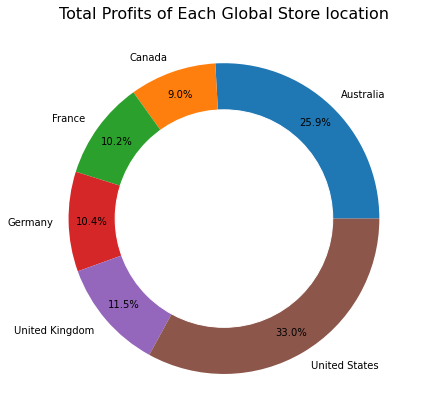

In [30]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
plt.pie(df_pie, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Total Profits of Each Global Store location",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()


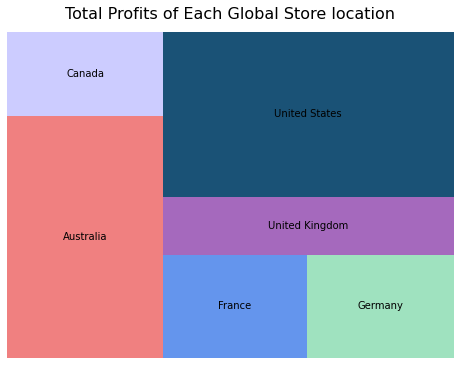

In [32]:
import squarify

plt.figure(figsize=(8,6))
color = ['#F08080', '#CCCCFF', '#6495ED', '#9FE2BF','#A569BD', '#1A5276']
label = ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']
squarify.plot(df_pie, label=label, color = color)
plt.axis('off')
plt.title("Total Profits of Each Global Store location",fontdict={'fontsize': 16}, y=1.02)
fig.tight_layout()
# plt.savefig('fig.png')
plt.show()

In [33]:
df.groupby(['Country', 'Customer_Gender'])['Revenue'].sum()

Country         Customer_Gender
Australia       F                  12853551
                M                  12450155
Canada          F                   3685994
                M                   4298700
France          F                   4665325
                M                   5160383
Germany         F                   5227480
                M                   4730940
United Kingdom  F                   5476250
                M                   5540244
United States   F                  14671015
                M                  15928551
Name: Revenue, dtype: int64

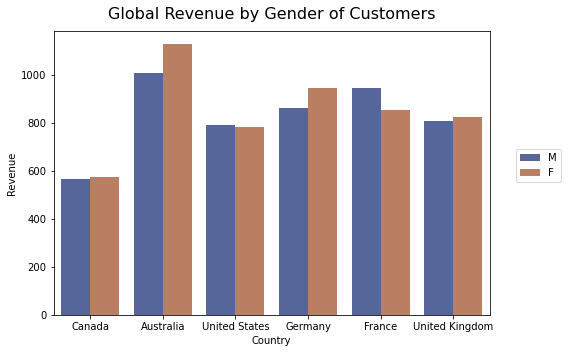

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data= df, x='Country', y='Revenue', hue='Customer_Gender', palette='dark', alpha =.7, ci=None, ax=ax)
plt.title('Global Revenue by Gender of Customers',fontdict={'fontsize': 16}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

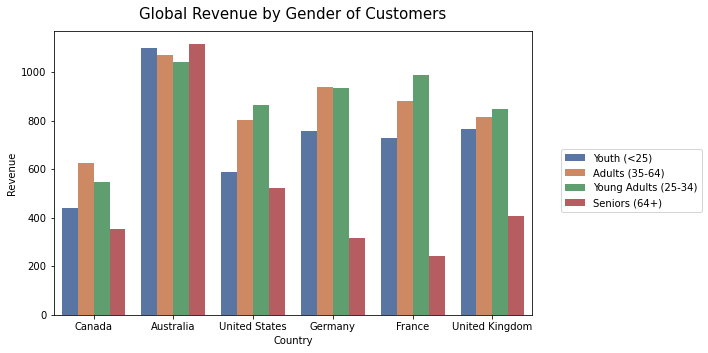

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= df, x='Country', y='Revenue', hue='Age_Group',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Global Revenue by Gender of Customers',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

In [38]:
df_pc = df.groupby(['Product_Category'])['Revenue'].sum()
df_pc

Product_Category
Accessories    16606777
Bikes          68827927
Clothing        9253884
Name: Revenue, dtype: int64

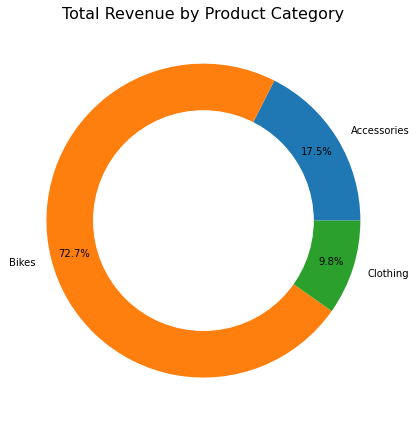

In [39]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
label = ['Accessories', 'Bikes', 'Clothing']
plt.pie(df_pc, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Total Revenue by Product Category",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [44]:
# Sort revenue from sub categories

df.groupby(['Sub_Category'])['Revenue'].sum().sort_values(ascending=False)

Sub_Category
Road Bikes           37221813
Mountain Bikes       23572163
Touring Bikes         8033951
Helmets               6353270
Tires and Tubes       5085759
Jerseys               4566082
Shorts                1901760
Bottles and Cages     1536207
Fenders               1366238
Hydration Packs       1094130
Vests                 1059584
Gloves                 959398
Caps                   605396
Bike Racks             568920
Bike Stands            381609
Cleaners               220644
Socks                  161664
Name: Revenue, dtype: int64

In [43]:
# Sort revenue from product sales

df.groupby(['Product'])['Revenue'].sum().sort_values(ascending=False)

Product
Road-150 Red, 62           4239930
Mountain-200 Black, 38     3745440
Road-150 Red, 56           3524330
Road-150 Red, 52           3474238
Mountain-200 Silver, 38    3401120
                            ...   
Mountain-500 Silver, 44      54240
Touring-3000 Blue, 50        51940
Road-650 Red, 52             40716
Mountain-500 Silver, 48      29380
Mountain-500 Black, 52       21600
Name: Revenue, Length: 130, dtype: int64

# Conclusion

We have done some activities in this project, such as;

Data cleaning,
Augmenting the data,
Some calculations,
Exploratory Data analysis.

Here are some findings.


Bikes are the most popular product category.
Road Bikes were the most popular sub Category.
Road-150 Red, 62 is the most popular product.
Women were the highest spenders on average across 6 global stores.
There were variations in highest spending age group but senior citizens were generally the lowest spenders.
United States is the most profitable market for the company.
